In [3]:
import cv2
import numpy as np
from  matplotlib import pyplot as plt
from imp import reload 
import sys
import os
import concurrent.futures



In [4]:
def getDictInfo(element, img_test, test_tag, cnt, dictInfo):
    if (True in (element['tag'] == a for a in test_tag)) or (True in (a in element['tag'] for a in test_tag)):
        x = int(element['x'])
        y = int(element['y'])
        w = int(element['width'])
        h = int(element['height'])
        dictInfo.append([x,y,w,h])
        cv2.rectangle(img_test, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(img_test, str(cnt), (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
        
def analyzeDict(img, test_tag):
    dictInfo=[]
    img_test = img.copy()
    ##94 elements
    cnt = 0
    for i in hierarchy_dict:
        cnt+=1
        print('i:',i["tag"], cnt)
        if "_EA@text" in i: print(i["_EA@text"], cnt)
        getDictInfo(i, img_test, test_tag, cnt, dictInfo)

        for j in i['child']:
            cnt+=1
            print('j:',j["tag"], cnt)
            if "_EA@text" in j: print(j["_EA@text"], cnt)
            getDictInfo(j, img_test, test_tag, cnt, dictInfo)

            for k in j['child']:
                cnt+=1
                print('k:',k["tag"], cnt)
                if "_EA@text" in k: print(k["_EA@text"], cnt)
                getDictInfo(k, img_test, test_tag, cnt, dictInfo)

                for l in k['child']:
                    cnt+=1
                    print('l:',l["tag"], cnt)
                    if "_EA@text" in l: print(l["_EA@text"], cnt)
                    getDictInfo(l, img_test, test_tag, cnt, dictInfo)

                    for m in l['child']:
                        cnt+=1
                        print('m:',m["tag"], cnt)
                        if "_EA@text" in m: print(m["_EA@text"], cnt)
                        getDictInfo(m, img_test, test_tag, cnt, dictInfo)

                        for n in m['child']:
                            cnt+=1
                            print('n:',n["tag"], cnt)
                            if "_EA@text" in n: print(n["_EA@text"], cnt)
                            getDictInfo(n, img_test, test_tag, cnt, dictInfo)

                            for o in n['child']:
                                cnt+=1
                                print('o:',o["tag"], cnt)
                                if "_EA@text" in o: print(o["_EA@text"], cnt)
                                getDictInfo(o, img_test, test_tag, cnt, dictInfo)



    print('total element num:', cnt)
    cv2.imwrite('experiment/target_'+str(IMG_NUM)+'.jpg', img_test)
    plt.figure(figsize=(50,25))
    img_test = cv2.cvtColor(img_test, cv2.COLOR_BGR2RGB)
    plt.imshow(img_test)
    return dictInfo

shape: 2436 1125
i: div 1
j: div 2
k: div 3
l: div 4
Google 翻譯 4
l: ['button', 'div'] 5
帳戶和設定。 選擇帳戶 5
k: div 6
l: button 7
日文 原始語言 7
l: button 8
切換語言 8
l: button 9
中文 (繁體) 譯文語言 9
l: div 10
j: div 11
k: div 12
l: div 13
m: button 14
翻譯手寫文字 14
m: button 15
翻譯語音 15
l: textInput 16
輸入文字 16
l: div 17
m: div 18
m: div 19
n: button 20
相機 即時鏡頭翻譯 20
n: button 21
對話 翻譯對話 21
n: ['div', 'button'] 22
['轉錄', '轉錄語音'] 22
k: ['ul', 'div'] 23
l: div 24
m: XCUIElementTypeImage 25
m: ['XCUIElementTypeImage', 'div'] 26
n: div 27
n: div 28
n: XCUIElementTypeImage 29
n: div 30
下載離線翻譯檔案後，即使離線也能進行翻譯。 30
n: button 31
‌日文, 中文 ‌日文, 中文 31
l: button 32
気配, 符號 32
l: button 33
揉める, 擦 33
l: button 34
ชื่อในวงการแน่ชัดว่าใช้ชื่อะไร แต่ติดปากเรียกโทมัตลอด นับตั้งแต่ได้ดูเขาในเ, 業界的名字很清楚。但總是叫湯姆自從看著他 34
l: button 35
うおじいねんよんゆぇんデュウぜっデュエバイ, うおじいねんよんゆぇんデュウぜっデュエバイ 35
l: div 36
垂直捲軸, 5頁 36
l: div 37
水平捲軸, 1頁 37
i: div 38
j: button 39
主畫面 39
j: button 40
已儲存 40
j: button 41
設定 41
total element num: 41


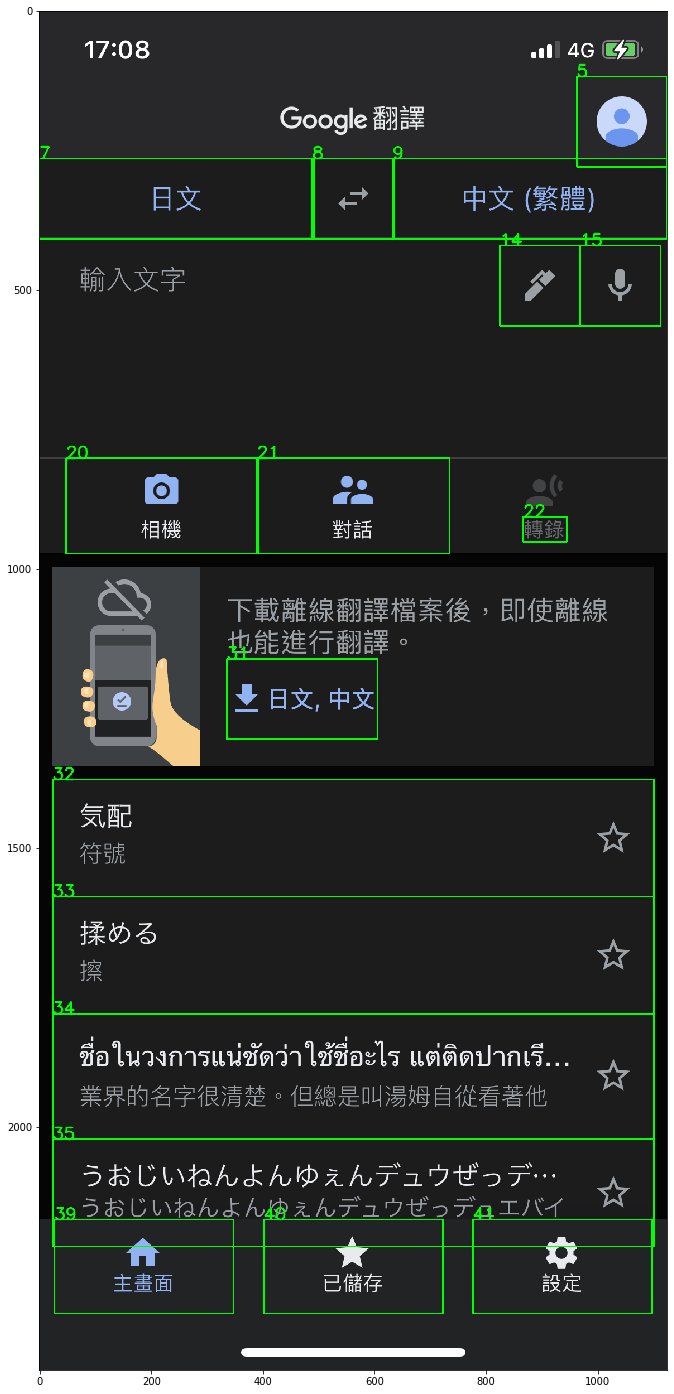

In [55]:
##analyze taad dumped dict and experiment
import json
from allProcess import *
reload(sys.modules['allProcess'])
from allProcess import *

IMG_LIST = [1]
IMG_NUM = 3


# print('===========PROCESSING IMAGE NUMBER '+str(IMG_NUM)+'=============')

    
with open('./experiment/'+str(IMG_NUM)+'.json', 'r') as fp:
#with open('./experiment/data.json', 'r') as fp:
    j = json.load(fp)
hierarchy_dict = j['child']

img = cv2.imread('./experiment/'+str(IMG_NUM)+'.png', 1)
#img = cv2.imread('./experiment/currentScreenshot.png', 1)
height,width,_ = img.shape
print('shape:', height,width)
test_tag=['button','img']


dictInfo = analyzeDict(img, test_tag)
#contours = allProcess(str(IMG_NUM), True)
#contourInfo = [c for c in contours if c[1][1]+c[1][3]>95]
#implement experiment設為true
##刪掉時間和電池圖示

[[963, 117, 162, 162], [0, 264, 492, 144], [489, 264, 147, 144], [633, 264, 492, 144], [825, 420, 144, 144], [969, 420, 144, 144], [48, 801, 345, 171], [390, 801, 345, 171], [867, 906, 78, 45], [336, 1161, 270, 144], [24, 1377, 1077, 210], [24, 1587, 1077, 210], [24, 1797, 1077, 225], [24, 2022, 1077, 192], [27, 2166, 321, 168], [402, 2166, 321, 168], [777, 2166, 321, 168]]
[[[104, [105, 100, -1, -1]], [875, 44, 215, 50], ['4G圖全', 73]], [[105, [106, 104, -1, -1]], [75, 45, 130, 48], ['17:08', 95]], [[100, [104, 99, 101, -1]], [992, 146, 104, 104], ['@', 49]], [[99, [100, 97, -1, -1]], [425, 162, 273, 68], ['Google翻譯', 95]], [[97, [99, 95, 98, -1]], [198, 306, 99, 59], ['AM', 91]], [[94, [95, 93, -1, -1]], [753, 306, 248, 63], ['中文', 96]], [[93, [94, 92, -1, -1]], [529, 308, 68, 56], ['一', 36]], [[90, [92, 88, 91, -1]], [66, 451, 203, 60], ['輸入文字', 96]], [[88, [90, 87, 89, -1]], [1013, 455, 56, 71], ['&', 87]], [[87, [88, 86, -1, -1]], [862, 458, 69, 69], ['多', 25]], [[74, [75, 73, -1, 

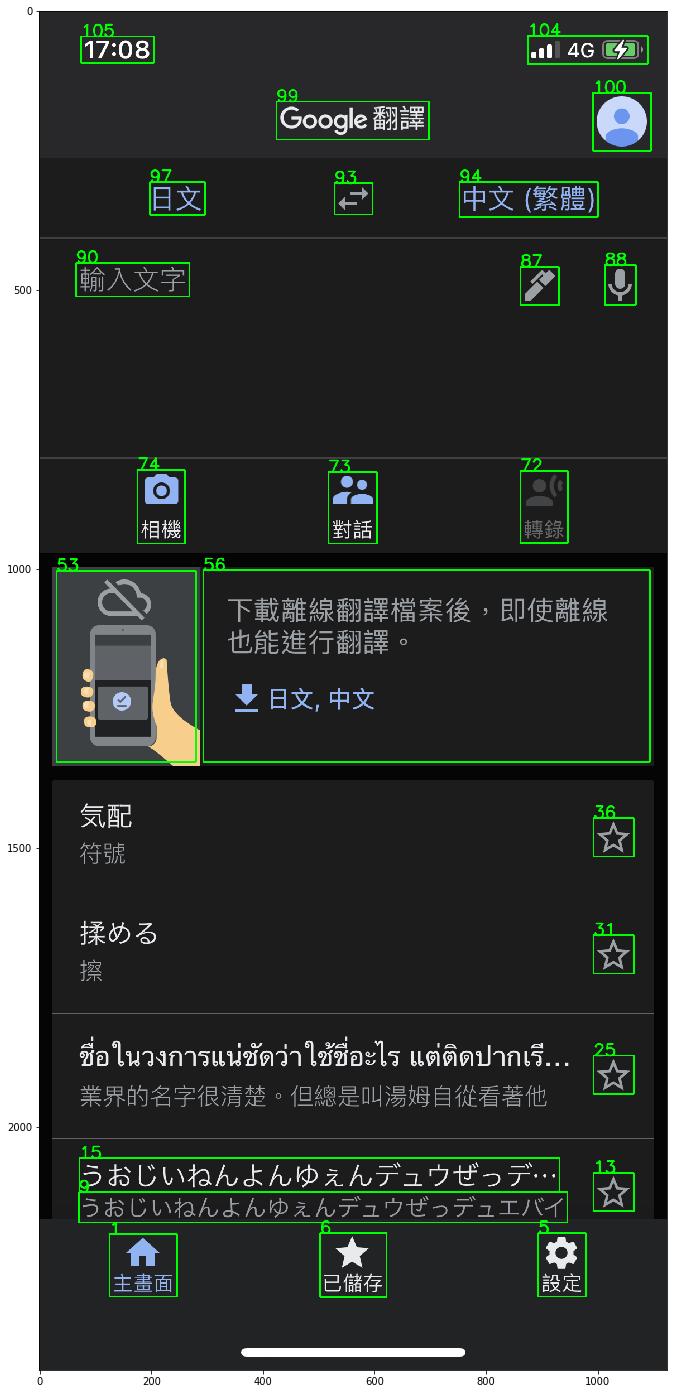

In [53]:

print(dictInfo)
print(contourInfo)

clone = img.copy()
for i,c in enumerate(contourInfo):
    x,y,w,h = c[1]
    cv2.rectangle(clone, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.putText(clone, str(c[0][0]), (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
cv2.imwrite('experiment/processed_'+str(IMG_NUM)+'.jpg', clone)
plt.figure(figsize=(50,25))
clone = cv2.cvtColor(clone, cv2.COLOR_BGR2RGB)
plt.imshow(clone)



In [18]:
%%time

tp=0
fp=0
fn=0
tn=0

for i in range(0,width+1):
    for j in range(0,height+1):
        for c in contourInfo:
            flag_b = 0 ##用來判斷有沒有在c裡，有的話會變1
            if i in range(c[1][0], c[1][0]+c[1][2]+1) and j in range(c[1][1], c[1][1]+c[1][3]+1):
                ##(i,j)在c裡
                flag_a = 0 ##用來判斷在c裡的有沒有在d裡，有的話會變1
                flag_b = 1
                for d in dictInfo:
                    if i in range(d[0], d[0]+d[2]+1) and j in range(d[1], d[1]+d[3]+1):
                        ##(i,j)在c裡且在d裡
                        ##true positive
                        tp+=1
                        flag_a = 1
                        #print([i,j],': tp')
                        break
                if flag_a ==0:
                    ##(i,j)在c裡但不在任何d裡
                    ##false positive
                    fp+=1
                    #print([i,j],': fp')
                    break
                else: break
                    
            if flag_b == 0:
                flag_c = 0 ##用來判斷不在c裡的有沒有在d裡，有的話會變1
                for d in dictInfo:
                    if i in range(d[0], d[0]+d[2]+1) and j in range(d[1], d[1]+d[3]+1):
                        ##(i,j)不在任何c裡但是在d裡
                        ##false negative
                        fn+=1
                        flag_c = 1
                        #print([i,j],': fn')
                        break
                if flag_c ==0:
                    ##(i,j)不在任何c裡也不在任何d裡 
                    ##true negative
                    tn+=1
                    #print([i,j],': tn')
                    break
                else: break

                
print(tp,fp,fn,tn)

34900 5060 2187852 516250
CPU times: user 28.4 s, sys: 129 ms, total: 28.6 s
Wall time: 29.8 s


In [9]:
print(tp,fp,fn,tn)
print(img.size)


14400 0 1441993 1287669
8221500


In [7]:
%%time
##facebook:(tp,fp,fn,tn) = (14400 0 1441993 1287669)
##instagram:(tp,fp,fn,tn)=34900 5060 2187852 516250

# a=[(x,y) for x in range(width+1) for y in range(height+1)]
# a=[(x,y) for x in range(5+1) for y in range(5+1)]
# print(len(a))
# NUM_THREADS = os.cpu_count()
# NUM_THREADS = 8
# print('Logical Processors: ',NUM_THREADS)

# tp=0
# fp=0
# fn=0
# tn=0

# def checkPixel(pixel,contourInfo,dictInfo):
#     for c in contourInfo:
#         flag_b = 0 ##用來判斷有沒有在c裡，有的話會變1
#         if i in range(c[1][0], c[1][0]+c[1][2]+1) and j in range(c[1][1], c[1][1]+c[1][3]+1):
#             ##(i,j)在c裡
#             flag_a = 0 ##用來判斷在c裡的有沒有在d裡，有的話會變1
#             flag_b = 1
#             for d in dictInfo:
#                 if i in range(d[0], d[0]+d[2]+1) and j in range(d[1], d[1]+d[3]+1):
#                     ##(i,j)在c裡且在d裡
#                     ##true positive
#                     tp+=1
#                     flag_a = 1
#                     print([i,j],': tp',tp)
#                     break
#             if flag_a ==0:
#                 ##(i,j)在c裡但不在任何d裡
#                 ##false positive
#                 fp+=1
#                 print([i,j],': fp',fp)
#                 break
#             else: break

#         if flag_b == 0:
#             flag_c = 0 ##用來判斷不在c裡的有沒有在d裡，有的話會變1
#             for d in dictInfo:
#                 if i in range(d[0], d[0]+d[2]+1) and j in range(d[1], d[1]+d[3]+1):
#                     ##(i,j)不在任何c裡但是在d裡
#                     ##false negative
#                     fn+=1
#                     flag_c = 1
#                     print([i,j],': fn',fn)
#                     break
#             if flag_c ==0:
#                 ##(i,j)不在任何c裡也不在任何d裡 
#                 ##true negative
#                 tn+=1
#                 print([i,j],': tn',tn)
#                 break
#             else: break
# with concurrent.futures.ThreadPoolExecutor(NUM_THREADS) as executor:
#     futures = {executor.submit(checkPixel, pixel,contourInfo, dictInfo): pixel for pixel in a}
#     concurrent.futures.wait(futures)

36
Logical Processors:  8
CPU times: user 4.92 ms, sys: 9.95 ms, total: 14.9 ms
Wall time: 21.1 ms
